In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('covid19.csv')
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [3]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [4]:
df.shape

(49068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
df.isnull().mean()*100

Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
dtype: float64

### percentage of null value in province/state column is 70% so drop the column

In [8]:
df=df.drop(columns=['Province/State'])

In [9]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### checking the contents in date column

In [10]:
df.Date.unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [11]:
df['Date']=pd.to_datetime(df.Date)
df.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


### Extracting year month day from the date column

In [13]:
df['Year']=pd.DatetimeIndex(df.Date).year
df['Month']=pd.DatetimeIndex(df.Date).month
df['Day']=pd.DatetimeIndex(df.Date).day
df.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month,Day
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020,1,22
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2020,1,22
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,2020,1,22
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,2020,1,22
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,2020,1,22
5,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas,2020,1,22
6,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas,2020,1,22
7,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe,2020,1,22
8,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific,2020,1,22
9,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific,2020,1,22


#### Droping lat,long,date columns

In [14]:
df.drop(columns=['Lat','Long','Date'], inplace=True)

#### Lets convert month numbers to their corresponding names

In [15]:
df.Month.replace({
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
}, inplace=True)
df.sample(100)

,Country/Region,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month,Day
3979,China,373,0,34,339,Western Pacific,2020,February,6
46081,Lebanon,2599,40,1485,1074,Eastern Mediterranean,2020,July,16
10142,Uzbekistan,0,0,0,0,Europe,2020,February,29
7180,Ireland,0,0,0,0,Europe,2020,February,18
31406,Croatia,2237,97,1978,162,Europe,2020,May,21
...,...,...,...,...,...,...,...,...,...
34139,Trinidad and Tobago,117,8,108,1,Americas,2020,May,31
24250,Guinea-Bissau,50,0,3,47,Africa,2020,April,23
24076,China,653,0,646,7,Western Pacific,2020,April,23
18768,West Bank and Gaza,161,1,18,142,Eastern Mediterranean,2020,April,2


### Rename column Country/Region to region

In [16]:
df.rename(columns = {'Country/Region':'Region'}, inplace = True)
df.head(10)

,Region,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month,Day
0,Afghanistan,0,0,0,0,Eastern Mediterranean,2020,January,22
1,Albania,0,0,0,0,Europe,2020,January,22
2,Algeria,0,0,0,0,Africa,2020,January,22
3,Andorra,0,0,0,0,Europe,2020,January,22
4,Angola,0,0,0,0,Africa,2020,January,22
5,Antigua and Barbuda,0,0,0,0,Americas,2020,January,22
6,Argentina,0,0,0,0,Americas,2020,January,22
7,Armenia,0,0,0,0,Europe,2020,January,22
8,Australia,0,0,0,0,Western Pacific,2020,January,22
9,Australia,0,0,0,0,Western Pacific,2020,January,22


### 1) Total number of death from each region

In [17]:
region_death=df.groupby(['Region'])['Deaths'].sum()

In [18]:
region_death

Region
Afghanistan           49098
Albania                5708
Algeria               77972
Andorra                5423
Angola                 1078
                      ...  
West Bank and Gaza     1370
Western Sahara           63
Yemen                 17707
Zambia                 2643
Zimbabwe                881
Name: Deaths, Length: 187, dtype: int64

In [19]:
region_death.max()

11011411

### 2) total death in china

In [20]:
df.query('Region=="China"')['Deaths'].sum()

672413

#### Rename column WHO Region to WHO_Region

In [21]:
df.rename(columns = {'WHO Region':'WHO_Region'}, inplace = True)
df.head(10)

,Region,Confirmed,Deaths,Recovered,Active,WHO_Region,Year,Month,Day
0,Afghanistan,0,0,0,0,Eastern Mediterranean,2020,January,22
1,Albania,0,0,0,0,Europe,2020,January,22
2,Algeria,0,0,0,0,Africa,2020,January,22
3,Andorra,0,0,0,0,Europe,2020,January,22
4,Angola,0,0,0,0,Africa,2020,January,22
5,Antigua and Barbuda,0,0,0,0,Americas,2020,January,22
6,Argentina,0,0,0,0,Americas,2020,January,22
7,Armenia,0,0,0,0,Europe,2020,January,22
8,Australia,0,0,0,0,Western Pacific,2020,January,22
9,Australia,0,0,0,0,Western Pacific,2020,January,22


### 3) No of people who recovered from Western Pacific	

In [22]:
df.query('WHO_Region=="Western Pacific"')['Recovered'].sum()

18861950

In [23]:
df.query('WHO_Region=="Europe"')['Recovered'].sum()

123202075

### 4) count of people who recovered from Africa

In [24]:
df.query('WHO_Region=="Africa"')['Recovered'].sum()

11193730

### 5) count of persons who recovered in january

In [25]:
df.query('Month=="January"')['Recovered'].sum()

838

### 6) count of person who confirmed in march

In [26]:
df.query('Month=="March"')['Confirmed'].sum()

9002815

### 7) count of person who confirmed in january 22

In [27]:
df.query('Month=="January" & Day==22')['Confirmed'].sum()

555

### 8) count of person who active in February 17 from Europe

In [28]:
df.query('Month=="February" & Day==17 & WHO_Region=="Europe"')['Active'].sum()

37

### 9) count of person who confirmed in 2020 March from India

In [29]:
df.query('Month=="March" & Year==2020 & Region=="India"')['Confirmed'].sum()

10252

### 10) Mean and sum of persons who confirmed from each region

In [30]:
region_confirmed_mean_sum=df.groupby(['Region'])['Confirmed'].agg(['mean','sum'])

In [31]:
region_confirmed_mean_sum

,mean,sum
Region,,
Afghanistan,10299.946809,1936390
Albania,1046.287234,196702
Algeria,6275.292553,1179755
Andorra,502.148936,94404
Angola,120.542553,22662
...,...,...
West Bank and Gaza,1241.813830,233461
Western Sahara,4.792553,901
Yemen,357.340426,67180


### 11) Mean and sum of persons who Recovered from each region

In [32]:
region_recovered_mean_sum=df.groupby(['Region'])['Recovered'].agg(['mean','sum'])

In [33]:
region_recovered_mean_sum

,mean,sum
Region,,
Afghanistan,4245.957447,798240
Albania,632.324468,118877
Algeria,4020.728723,755897
Andorra,367.414894,69074
Angola,34.962766,6573
...,...,...
West Bank and Gaza,325.127660,61124
Western Sahara,3.446809,648
Yemen,126.484043,23779


### 12) Mean and sum of persons who active from each WHO region

In [34]:
WHOregion_active_mean_sum=df.groupby(['WHO_Region'])['Active'].agg(['mean','sum'])

In [35]:
WHOregion_active_mean_sum

,mean,sum
WHO_Region,,
Africa,1125.678081,10158119
Americas,26113.836494,225832458
Eastern Mediterranean,5828.858801,24108160
Europe,7074.912101,106406678
South-East Asia,12569.097872,23629904
Western Pacific,636.366634,6580031


### 13) Mean and sum of persons who recovered from each WHO region

In [36]:
WHOregion_recovered_mean_sum=df.groupby(['WHO_Region'])['Recovered'].agg(['mean','sum'])

In [37]:
WHOregion_recovered_mean_sum

,mean,sum
WHO_Region,,
Africa,1240.439938,11193730
Americas,18162.516651,157069444
Eastern Mediterranean,11617.674807,48050703
Europe,8191.627327,123202075
South-East Asia,15973.578191,30030327
Western Pacific,1824.173114,18861950


### 14) Mean and sum of persons who confirmed from each WHO region

In [38]:
WHOregion_confirmed_mean_sum=df.groupby(['WHO_Region'])['Confirmed'].agg(['mean','sum'])

In [39]:
WHOregion_confirmed_mean_sum

,mean,sum
WHO_Region,,
Africa,2414.874446,21791827
Americas,46514.939177,402261194
Eastern Mediterranean,17911.724371,74082892
Europe,16547.858577,248879793
South-East Asia,29318.279255,55118365
Western Pacific,2550.716731,26374411


### 15) Average of confirmed persons in each WHO Region

In [40]:
avg_confirmed_WHORegion=df.groupby(['WHO_Region'])['Confirmed']

In [41]:
avg_confirmed_WHORegion.mean()

WHO_Region
Africa                    2414.874446
Americas                 46514.939177
Eastern Mediterranean    17911.724371
Europe                   16547.858577
South-East Asia          29318.279255
Western Pacific           2550.716731
Name: Confirmed, dtype: float64

### 16) Average of death in each WHO Region

In [42]:
avg_death_WHORegion=df.groupby(['WHO_Region'])['Deaths']

In [43]:
avg_death_WHORegion.mean()

WHO_Region
Africa                     48.756427
Americas                 2238.586031
Eastern Mediterranean     465.190764
Europe                   1281.319149
South-East Asia           775.603191
Western Pacific            90.176983
Name: Deaths, dtype: float64

### 17) no of persons died in india in 2020

In [44]:
df.query('Region=="India" & Year==2020')['Deaths'].sum()

1111831

### 18) Average of active persons in each WHO Region

In [45]:
avg_active_WHORegion=df.groupby(['WHO_Region'])['Active']

In [46]:
avg_active_WHORegion.mean()

WHO_Region
Africa                    1125.678081
Americas                 26113.836494
Eastern Mediterranean     5828.858801
Europe                    7074.912101
South-East Asia          12569.097872
Western Pacific            636.366634
Name: Active, dtype: float64

In [47]:
df.head()

,Region,Confirmed,Deaths,Recovered,Active,WHO_Region,Year,Month,Day
0,Afghanistan,0,0,0,0,Eastern Mediterranean,2020,January,22
1,Albania,0,0,0,0,Europe,2020,January,22
2,Algeria,0,0,0,0,Africa,2020,January,22
3,Andorra,0,0,0,0,Europe,2020,January,22
4,Angola,0,0,0,0,Africa,2020,January,22


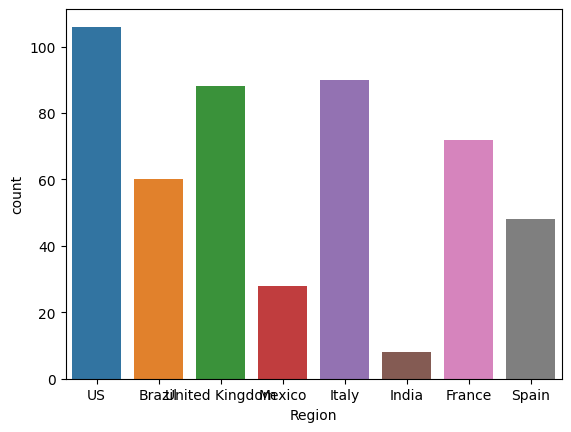

In [48]:
sns.countplot('Region', data=df.sort_values(by='Deaths', ascending=False)[:500])
plt.show()

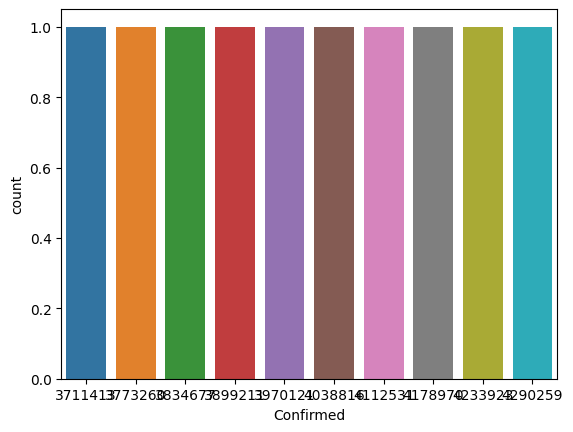

In [49]:
sns.countplot('Confirmed', data =df.sort_values(by='Deaths', ascending=False)[:10])
plt.show()

In [50]:
barx = df.groupby(['Region'])['Deaths'].sum()

In [51]:
barx

Region
Afghanistan           49098
Albania                5708
Algeria               77972
Andorra                5423
Angola                 1078
                      ...  
West Bank and Gaza     1370
Western Sahara           63
Yemen                 17707
Zambia                 2643
Zimbabwe                881
Name: Deaths, Length: 187, dtype: int64

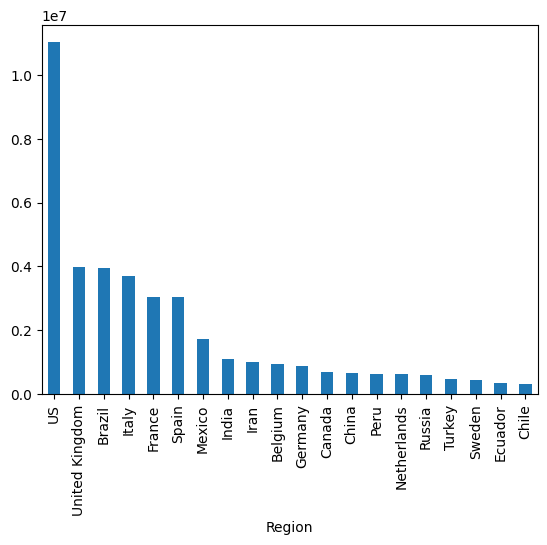

In [52]:
barx.sort_values(ascending=False)[:20].plot.bar();

In [53]:
wd = df.groupby(['WHO_Region'])['Deaths'].sum()

In [54]:
wd

WHO_Region
Africa                     439978
Americas                 19359292
Eastern Mediterranean     1924029
Europe                   19271040
South-East Asia           1458134
Western Pacific            932430
Name: Deaths, dtype: int64

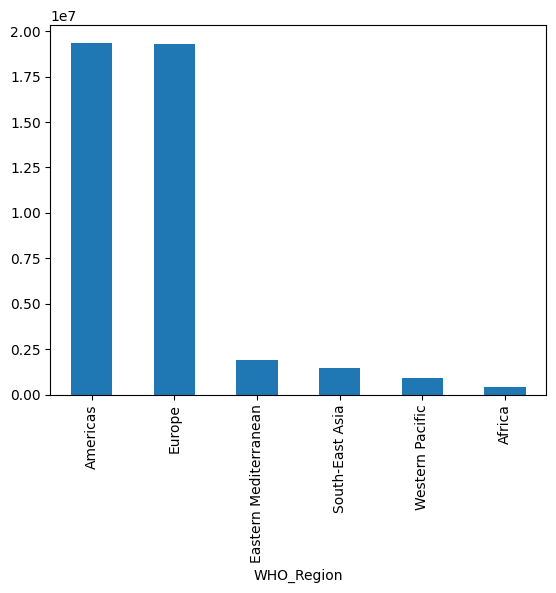

In [55]:
wd.sort_values(ascending=False).plot.bar();

In [56]:
who_active=df.groupby(['WHO_Region'])['Active'].sum()

In [57]:
who_active

WHO_Region
Africa                    10158119
Americas                 225832458
Eastern Mediterranean     24108160
Europe                   106406678
South-East Asia           23629904
Western Pacific            6580031
Name: Active, dtype: int64

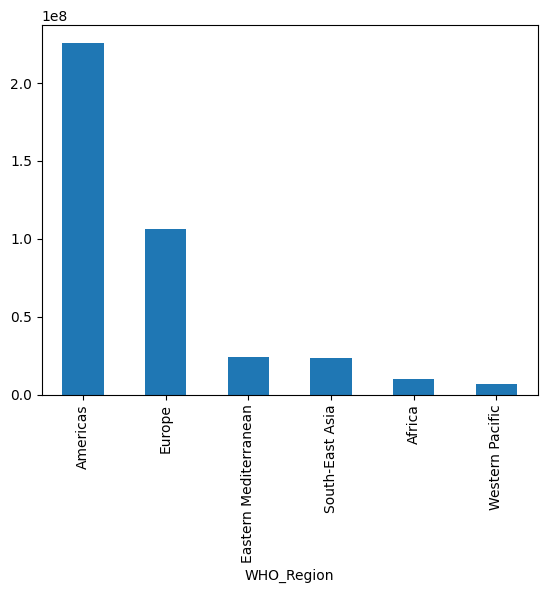

In [58]:
who_active.sort_values(ascending=False).plot.bar();

In [59]:
who_recovered=df.groupby(['WHO_Region'])['Recovered'].sum()

In [60]:
who_recovered

WHO_Region
Africa                    11193730
Americas                 157069444
Eastern Mediterranean     48050703
Europe                   123202075
South-East Asia           30030327
Western Pacific           18861950
Name: Recovered, dtype: int64

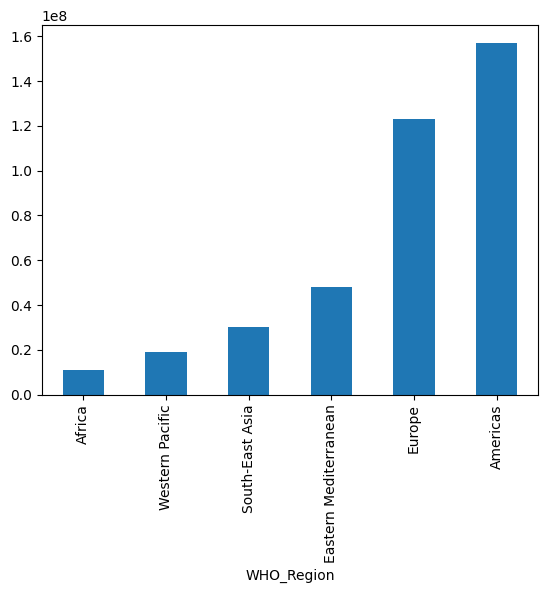

In [61]:
who_recovered.sort_values(ascending=True).plot.bar();

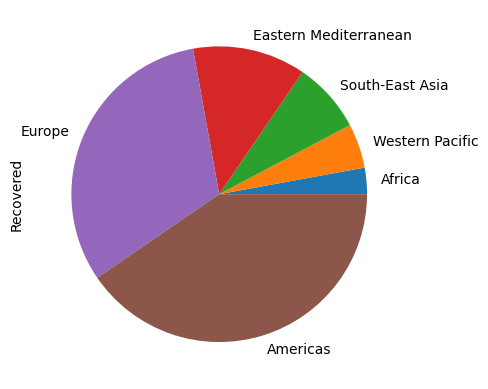

In [62]:
who_recovered.sort_values(ascending=True).plot.pie();

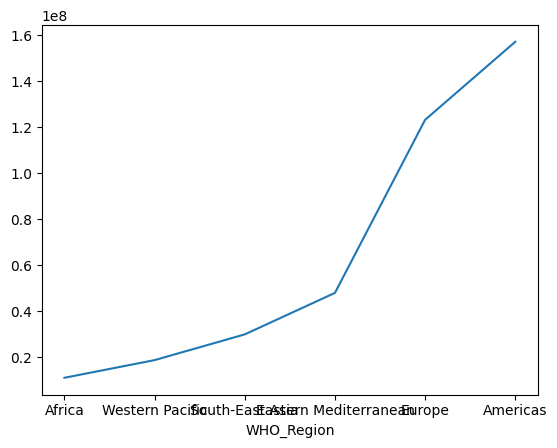

In [63]:
who_recovered.sort_values(ascending=True).plot.line();

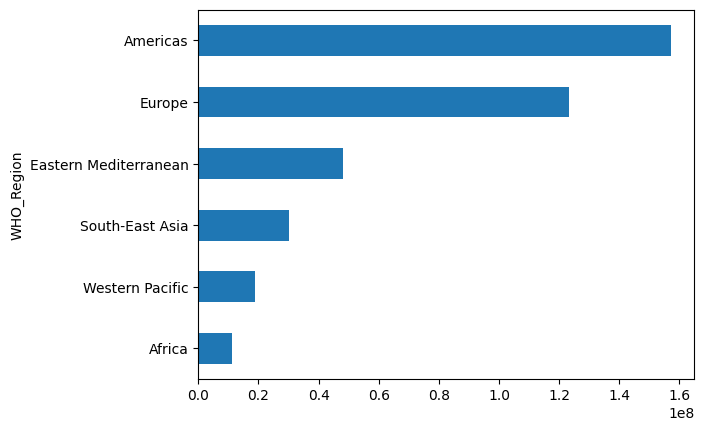

In [64]:
who_recovered.sort_values(ascending=True).plot.barh();

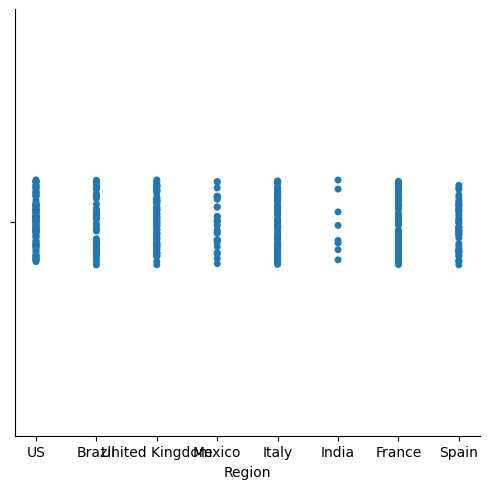

In [65]:
sns.catplot('Region', data=df.sort_values(by='Deaths', ascending=False)[:500])
plt.show()

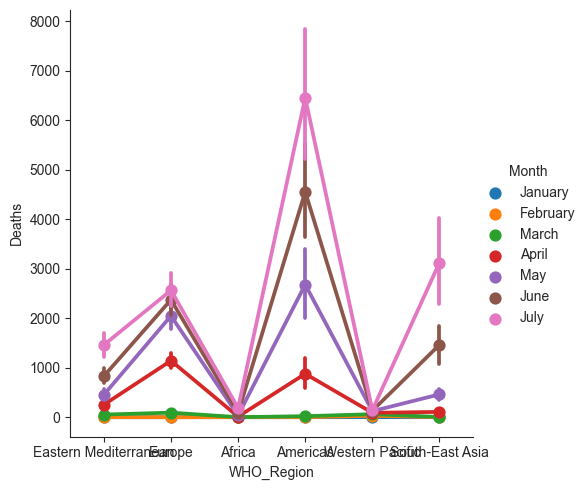

In [66]:
sns.set_style('ticks')
sns.factorplot('WHO_Region','Deaths',hue='Month',data=df)
plt.show()

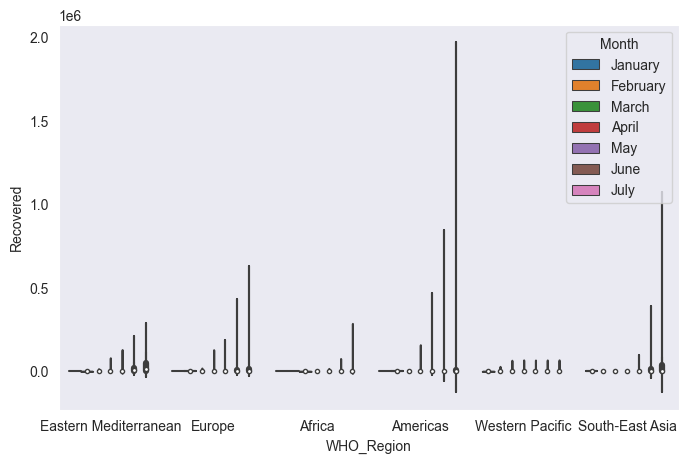

In [72]:
sns.set_style('dark')
plt.figure(figsize=(8,5))
sns.violinplot('WHO_Region','Recovered',hue='Month',data=df)
plt.show()

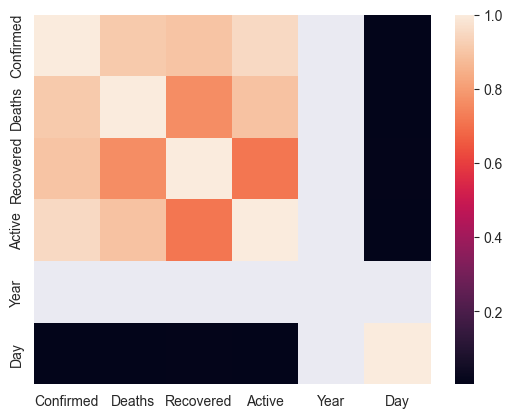

In [73]:
heat_map=df.corr()
sns.heatmap(heat_map)
plt.show()

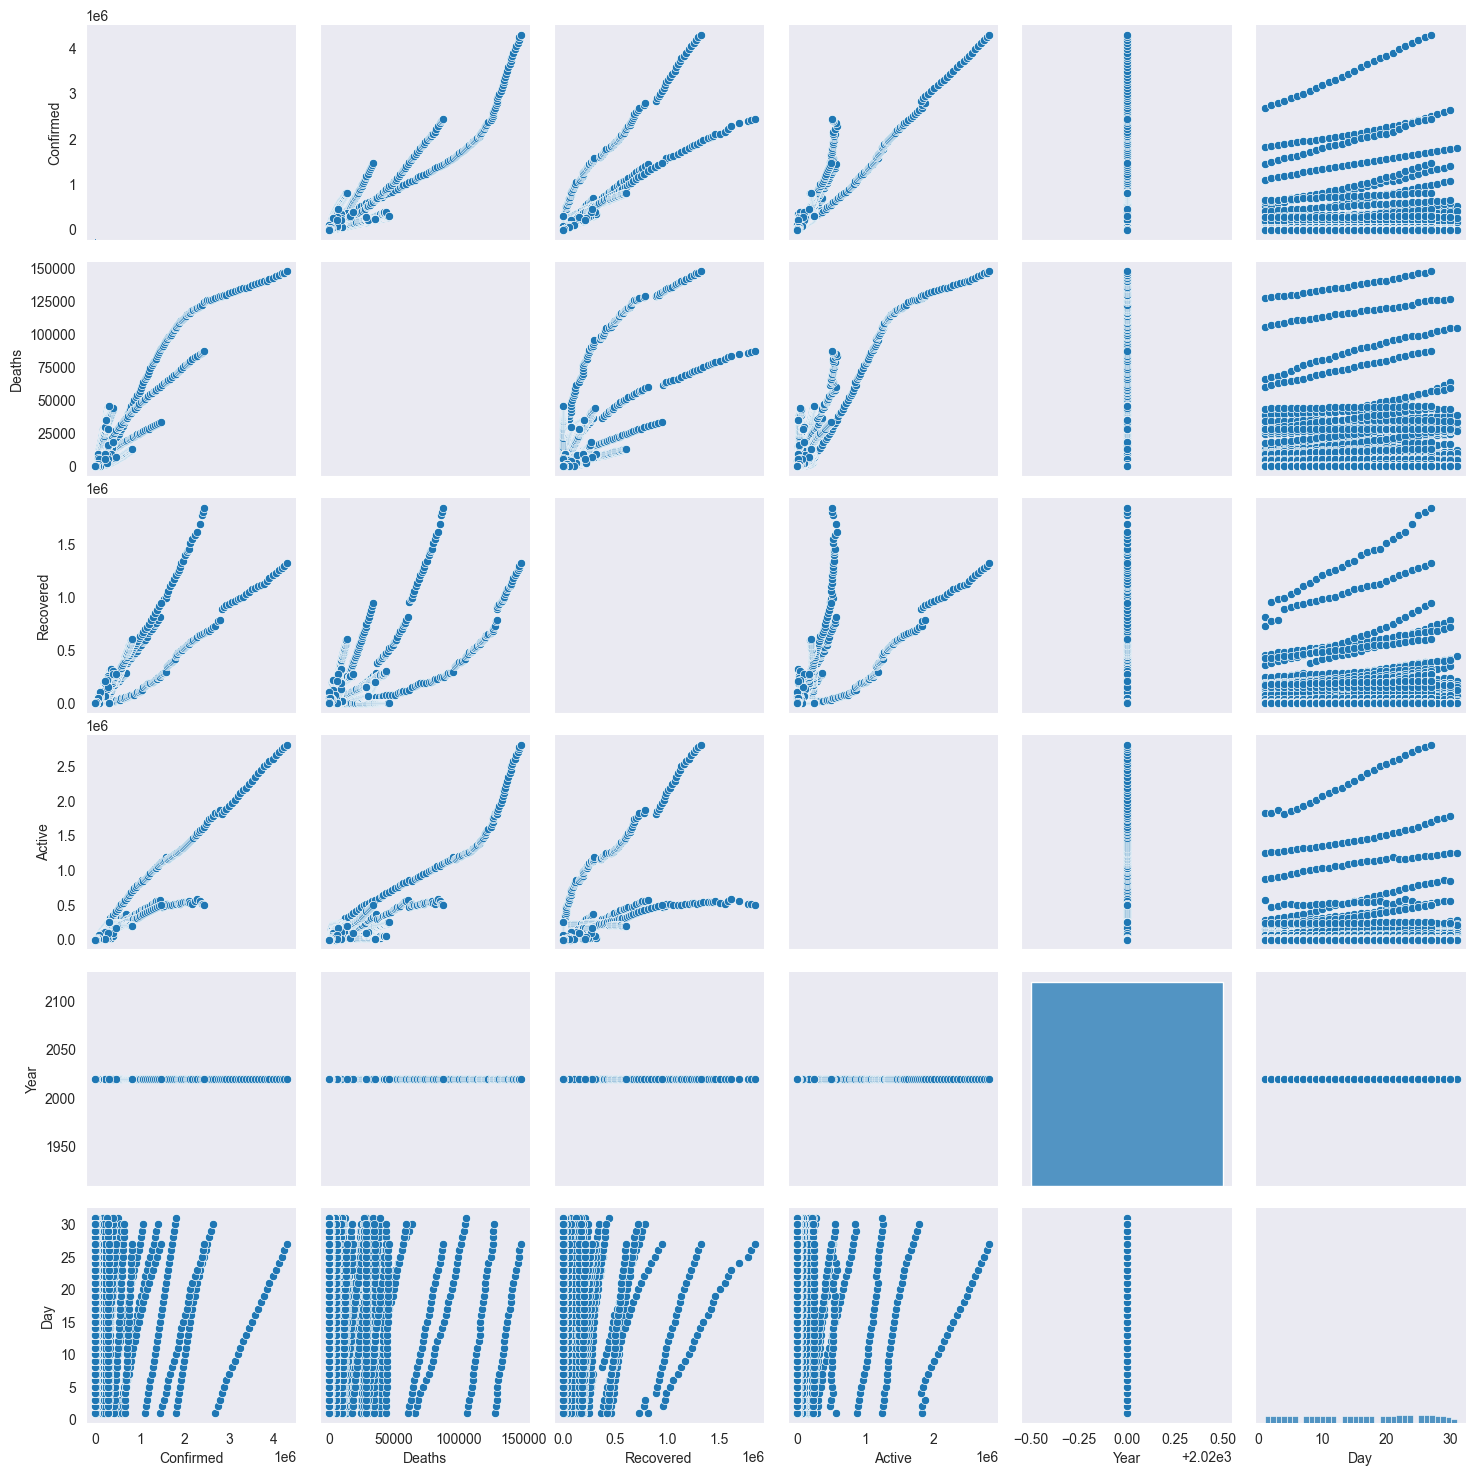

In [74]:
sns.pairplot(data=df)
plt.show()